In [435]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

df= pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [495]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [497]:
df.shape

(200, 6)

In [498]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [499]:
m_df = df[df["Sex"] == "M"]
m_df.value_counts()

Age  Sex  BP      Cholesterol  Na_to_K  Drug 
15   M    HIGH    NORMAL       17.206   DrugY    1
          NORMAL  HIGH         9.084    drugX    1
60   M    HIGH    HIGH         13.934   drugB    1
59   M    HIGH    HIGH         13.935   drugB    1
58   M    HIGH    HIGH         18.991   DrugY    1
                                                ..
37   M    LOW     NORMAL       8.968    drugX    1
36   M    LOW     NORMAL       11.424   drugX    1
35   M    NORMAL  NORMAL       7.845    drugX    1
          LOW     NORMAL       9.170    drugX    1
74   M    LOW     NORMAL       11.939   drugX    1
Length: 104, dtype: int64

In [500]:
f_df = df[df["Sex"] == "F"]
f_df.describe()

,Age,Na_to_K
count,96.000000,96.000000
mean,42.562500,17.022063
std,16.395643,7.351667
min,15.000000,6.683000
25%,28.000000,11.310000
50%,40.000000,14.440500
75%,57.000000,21.451250
max,74.000000,38.247000


In [501]:
chol_level_list = df["Cholesterol"].unique().tolist()
print(chol_level_list)

['HIGH', 'NORMAL']


In [502]:
bp_level_list = df["BP"].unique().tolist()
print(bp_level_list)

['HIGH', 'LOW', 'NORMAL']


In [503]:
drug_list = df["Drug"].unique().tolist()
print(drug_list)

['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']


In [504]:
def create_drug_df(df):
    drug_list = df["Drug"].unique().tolist()
    drug_df_dict = {}
    for drug in drug_list:
        drug_df_dict[drug] = df[df["Drug"] == drug]
    return drug_df_dict

drug_df_dict = create_drug_df(df)

drugY_df = drug_df_dict["DrugY"]
drugY_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
4,61,F,LOW,HIGH,18.043,DrugY
6,49,F,NORMAL,HIGH,16.275,DrugY
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [505]:
drugY_df = drug_df_dict["DrugY"]
drugC_df = drug_df_dict["drugC"]
drugX_df = drug_df_dict["drugX"]
drugA_df = drug_df_dict["drugA"]
drugB_df = drug_df_dict["drugB"]

In [506]:
drugC_df.describe()

,Age,Na_to_K
count,16.00000,16.000000
mean,42.50000,10.633750
std,16.72523,2.045009
min,16.00000,6.769000
25%,27.50000,9.978250
50%,47.00000,10.490500
75%,50.75000,11.826750
max,72.00000,14.160000


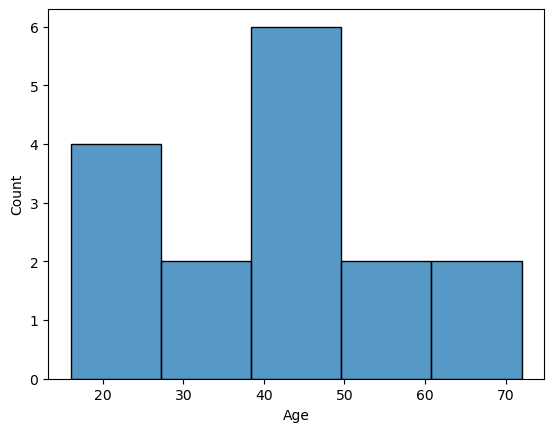

In [507]:
sns.histplot(data=drugC_df, x='Age')
plt.show()

In [508]:
#DrugC mostly used at the age of 40-50 between

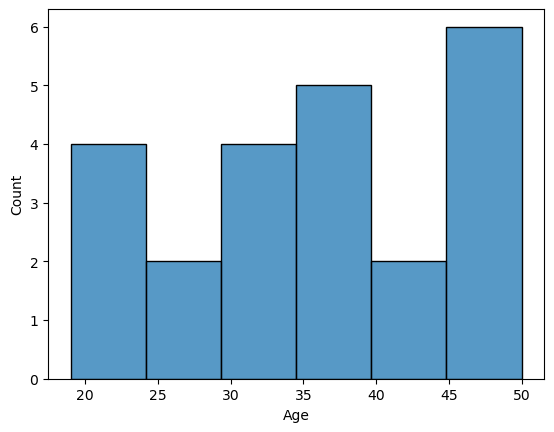

In [509]:
sns.histplot(data=drugA_df, x='Age')
plt.show()

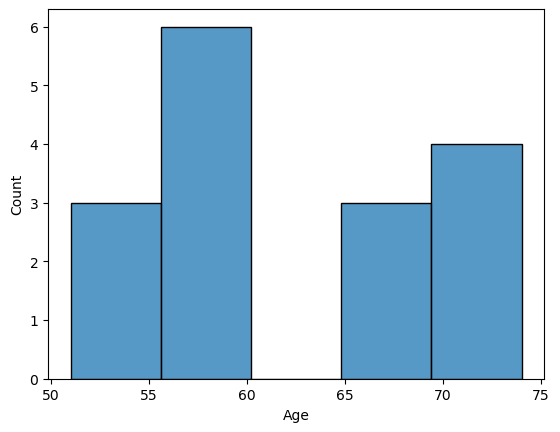

In [510]:
sns.histplot(data=drugB_df, x='Age')
plt.show()

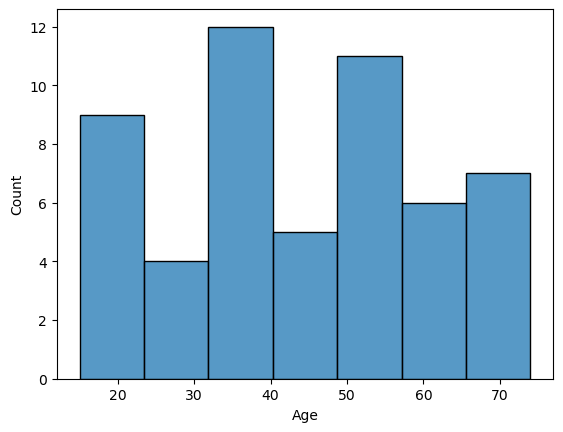

In [511]:
sns.histplot(data=drugX_df, x='Age')
plt.show()

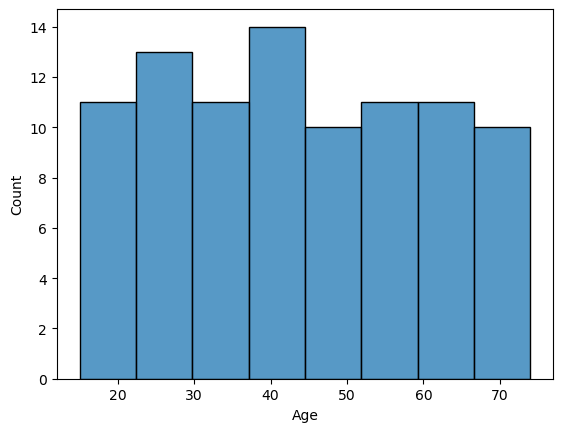

In [512]:
sns.histplot(data=drugY_df, x='Age')
plt.show()

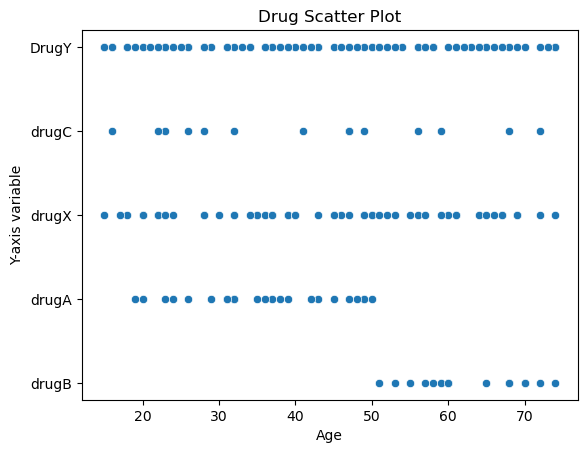

In [515]:
import seaborn as sns
import matplotlib.pyplot as plt

# create scatter plot using SNS
sns.scatterplot(data=df, x='Age', y='Drug')

# add title and axis labels
plt.title("Drug Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Y-axis variable")

# show the plot
plt.show()

<AxesSubplot:xlabel='Drug', ylabel='Age'>

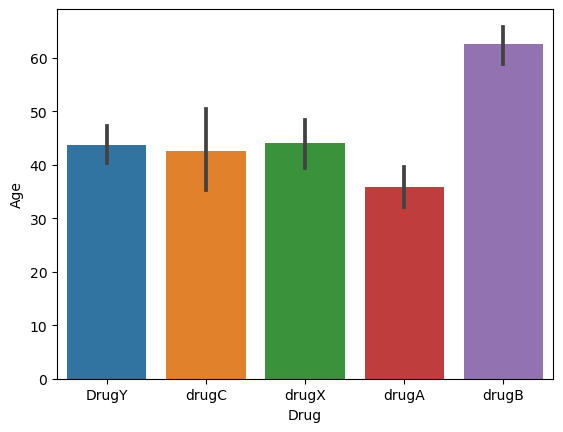

In [456]:
sns.barplot(x = "Drug", y = "Age", data = df)

In [457]:
#we can see that drugB also can used in older patients too.

In [516]:
bp_map = {'HIGH': 3, 'NORMAL': 2, 'LOW': 1}

# use the map() function to convert the 'BP' column to integers
df['BP'] = df['BP'].map(bp_map).astype(int)

In [517]:
df.describe()

,Age,BP,Na_to_K
count,200.000000,200.000000,200.000000
mean,44.315000,2.065000,16.084485
std,16.544315,0.839224,7.223956
min,15.000000,1.000000,6.269000
25%,31.000000,1.000000,10.445500
50%,45.000000,2.000000,13.936500
75%,58.000000,3.000000,19.380000
max,74.000000,3.000000,38.247000


In [518]:
chol_map = {'HIGH': 3, 'NORMAL': 2}

# use the map() function to convert the 'BP' column to integers
df['Cholesterol'] = df['Cholesterol'].map(bp_map).astype(int)

In [519]:
df.describe()

,Age,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000
mean,44.315000,2.065000,2.515000,16.084485
std,16.544315,0.839224,0.501029,7.223956
min,15.000000,1.000000,2.000000,6.269000
25%,31.000000,1.000000,2.000000,10.445500
50%,45.000000,2.000000,3.000000,13.936500
75%,58.000000,3.000000,3.000000,19.380000
max,74.000000,3.000000,3.000000,38.247000


<AxesSubplot:xlabel='Cholesterol', ylabel='BP'>

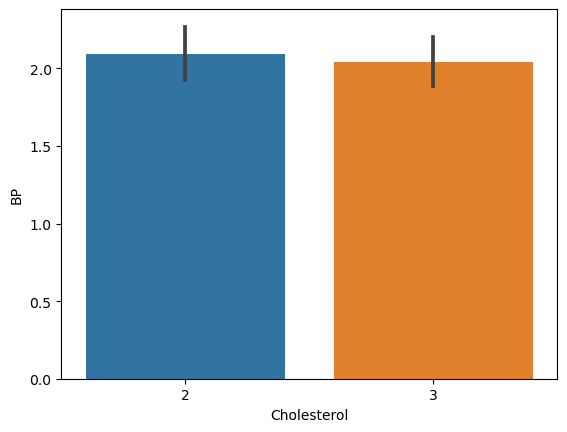

In [520]:
sns.barplot(x = "Cholesterol",y= "BP",  data = df)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

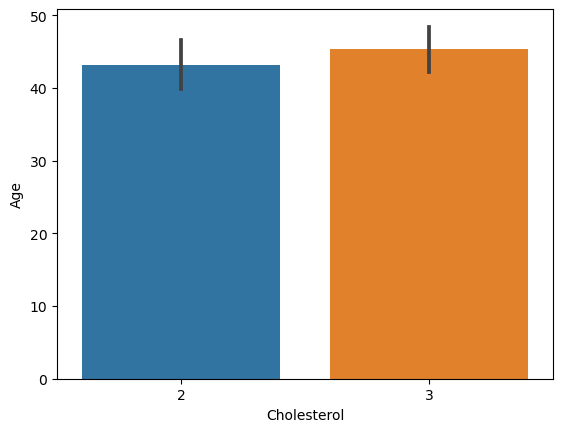

In [463]:
sns.barplot(x = "Cholesterol",y= "Age",  data = df)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

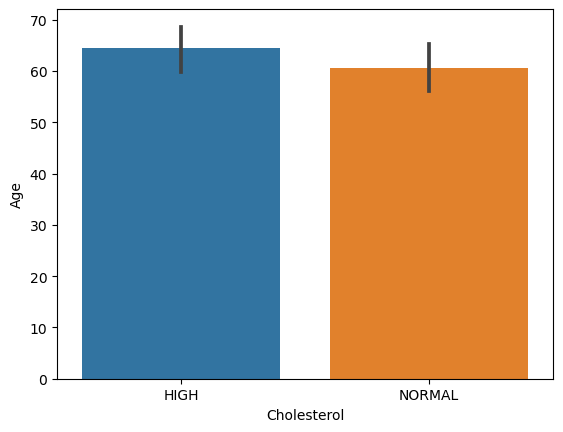

In [464]:
#drugY_df = drug_df_dict["DrugY"]
#drugC_df = drug_df_dict["drugC"]
#drugX_df = drug_df_dict["drugX"]
#drugA_df = drug_df_dict["drugA"]
#drugB_df = drug_df_dict["drugB"]

sns.barplot(x = "Cholesterol", y = "Age", data = drugB_df)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

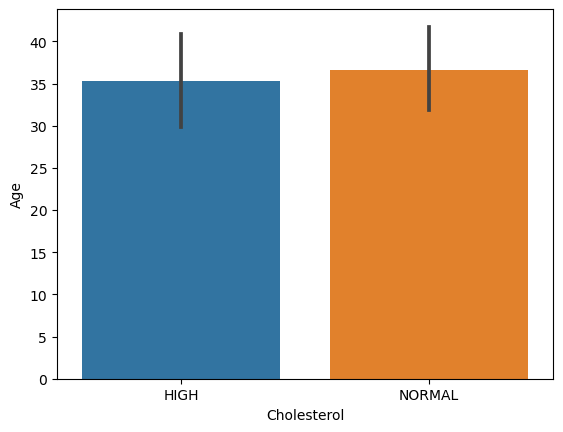

In [465]:
sns.barplot(x = "Cholesterol", y = "Age", data = drugA_df)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

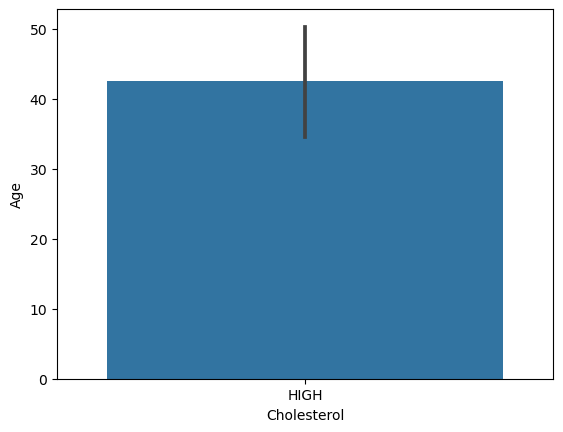

In [466]:
sns.barplot(x = "Cholesterol",y = "Age", data = drugC_df)

In [467]:
#there is remarkable point in here drugC is only preferred in high cholestrol levels.

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

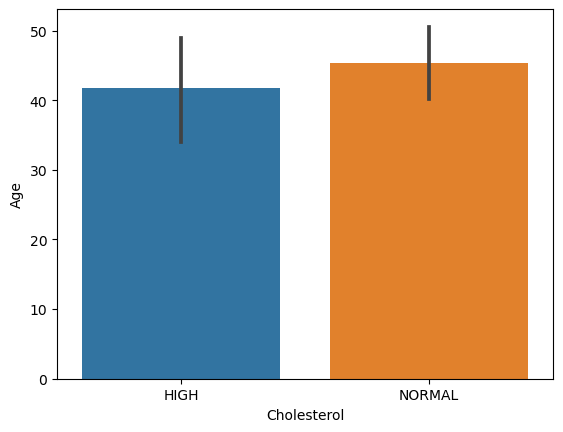

In [468]:
sns.barplot(x = "Cholesterol", y = "Age", data = drugX_df)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

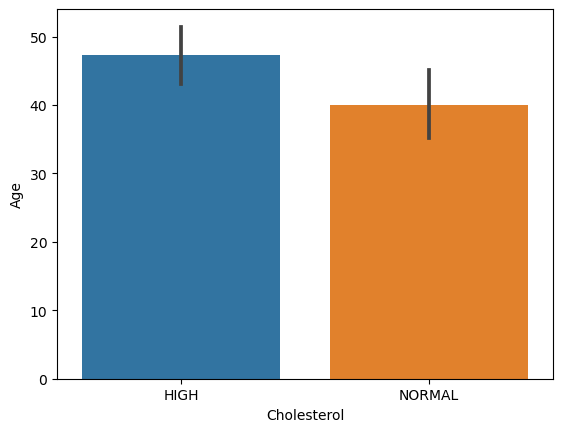

In [469]:
sns.barplot(x = "Cholesterol", y = "Age", data = drugY_df)

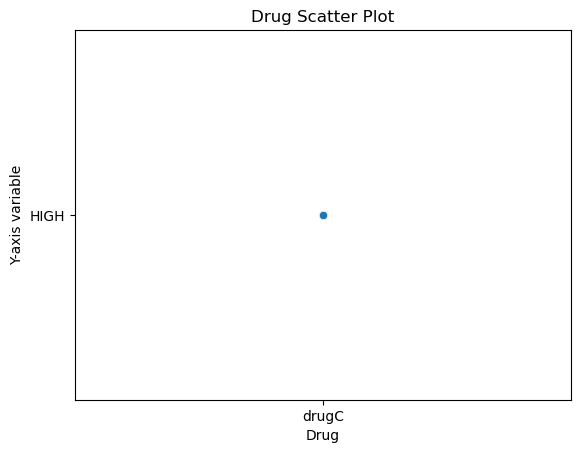

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt

# create scatter plot using SNS
sns.scatterplot(data=drugC_df,x='Drug', y="Cholesterol")

# add title and axis labels
plt.title("Drug Scatter Plot")
plt.xlabel("Drug")
plt.ylabel("Y-axis variable")

# show the plot
plt.show()

In [471]:
#there is remarkable point in here drugC is only preferred in high cholestrol levels.

In [521]:
df.groupby(['BP']).agg({'Na_to_K':'mean'})

,Na_to_K
BP,
1,16.539797
2,14.342746
3,17.040623


In [522]:
df.groupby(['Cholesterol']).agg({'Na_to_K':'mean'})

,Na_to_K
Cholesterol,
2,16.158742
3,16.014553


In [474]:
df.corr()

,Age,BP,Cholesterol,Na_to_K
Age,1.000000,-0.120918,0.068234,-0.063119
BP,-0.120918,1.000000,-0.032208,0.036871
Cholesterol,0.068234,-0.032208,1.000000,-0.010000
Na_to_K,-0.063119,0.036871,-0.010000,1.000000


In [523]:
drugY_df.describe()

,Age,Na_to_K
count,91.000000,91.000000
mean,43.747253,22.374780
std,17.031731,6.060195
min,15.000000,15.015000
25%,28.500000,17.218000
50%,42.000000,20.489000
75%,58.000000,25.971500
max,74.000000,38.247000


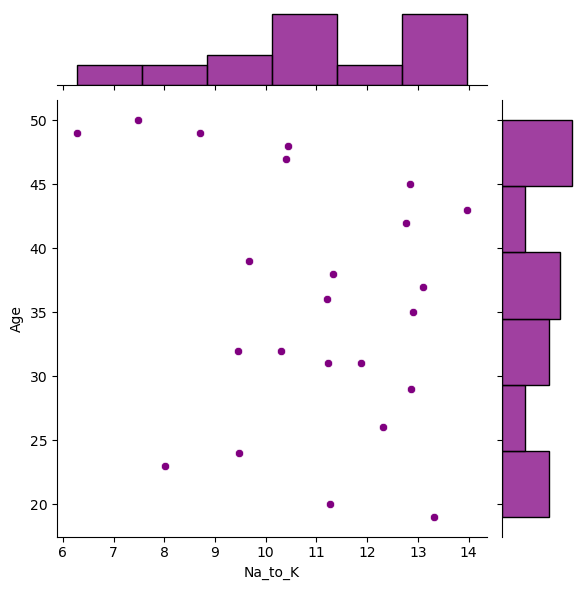

In [476]:
sns.jointplot(x = 'Na_to_K', y = "Age", data = drugA_df, color="purple")

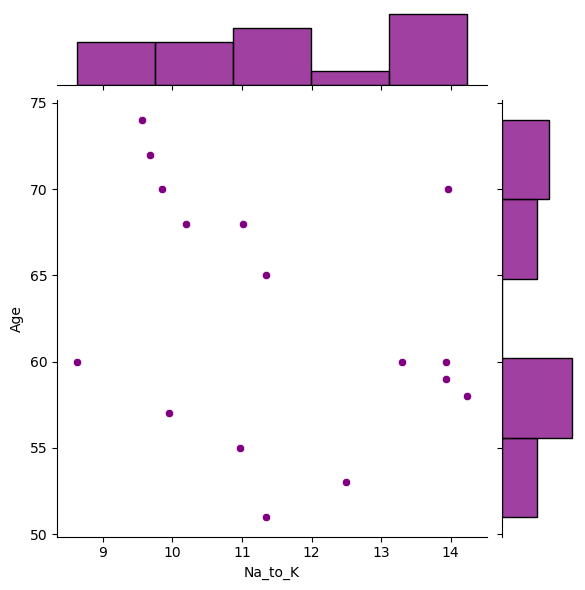

In [477]:
sns.jointplot(x = 'Na_to_K', y = "Age", data = drugB_df, color="purple")

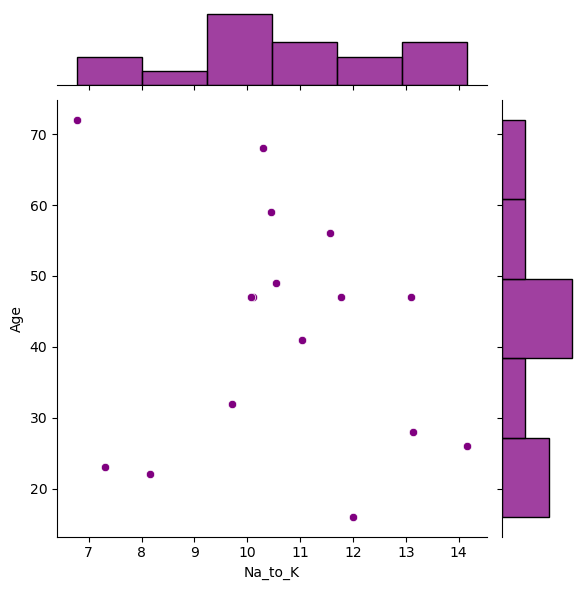

In [478]:
sns.jointplot(x = 'Na_to_K', y = "Age", data = drugC_df, color="purple")

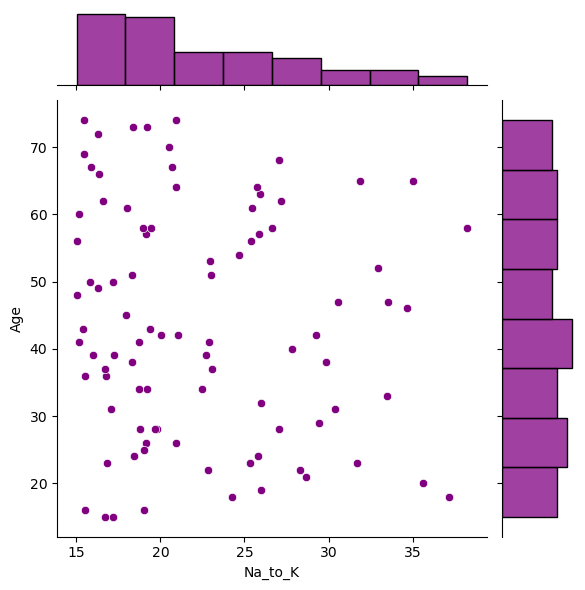

In [479]:
sns.jointplot(x = 'Na_to_K', y = "Age", data = drugY_df, color="purple")

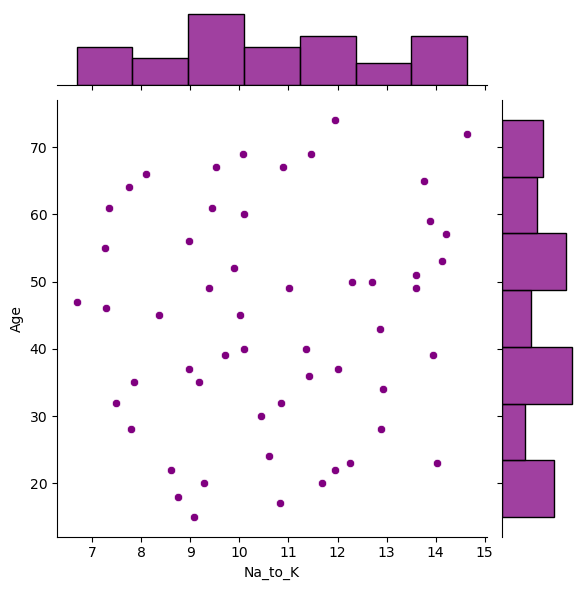

In [480]:
sns.jointplot(x = 'Na_to_K', y = "Age", data = drugX_df, color="purple")

In [481]:
drugA_df.corr()

,Age,Na_to_K
Age,1.000000,-0.271299
Na_to_K,-0.271299,1.000000


In [482]:
# create a DataFrame with 'Drug' column containing string values
df['Drug'] = pd.DataFrame({'Drug': ['drugX', 'DrugY', 'drugA','drugB','drugC']})

# convert 'Drug' column to categorical data type
df['Drug'] = df['Drug'].astype('category')

In [483]:
df['Drug'].head()

0    drugX
1    DrugY
2    drugA
3    drugB
4    drugC
Name: Drug, dtype: category
Categories (5, object): ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

In [484]:
age_df = df.groupby(['Drug']).agg({'Age': 'mean'})
df.groupby(['Drug']).agg({'Age': 'mean'})

,Age
Drug,
DrugY,47.0
drugA,47.0
drugB,28.0
drugC,61.0
drugX,23.0


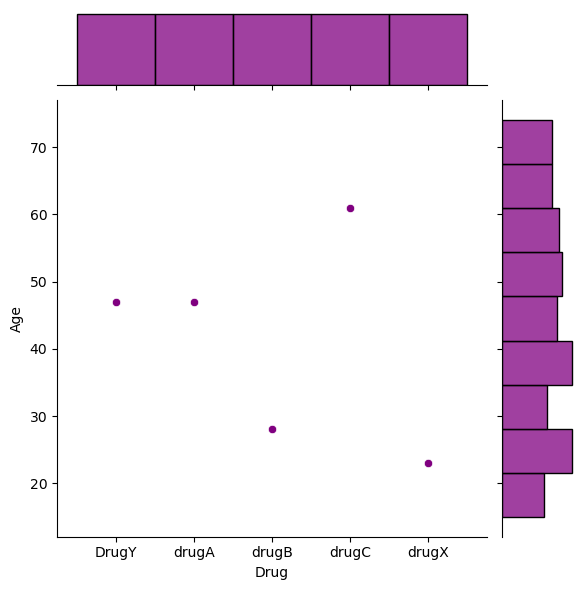

In [485]:
sns.jointplot(x = 'Drug', y = "Age", data = df, color="purple")

In [486]:
df.groupby(['Drug']).agg({'Na_to_K': 'mean'})

,Na_to_K
Drug,
DrugY,13.093
drugA,10.114
drugB,7.798
drugC,18.043
drugX,25.355


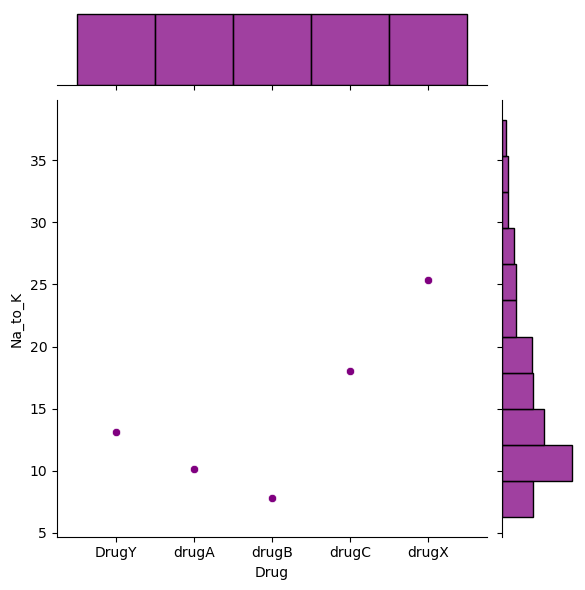

In [487]:
sns.jointplot(x = 'Drug', y = 'Na_to_K', data = df, color="purple")

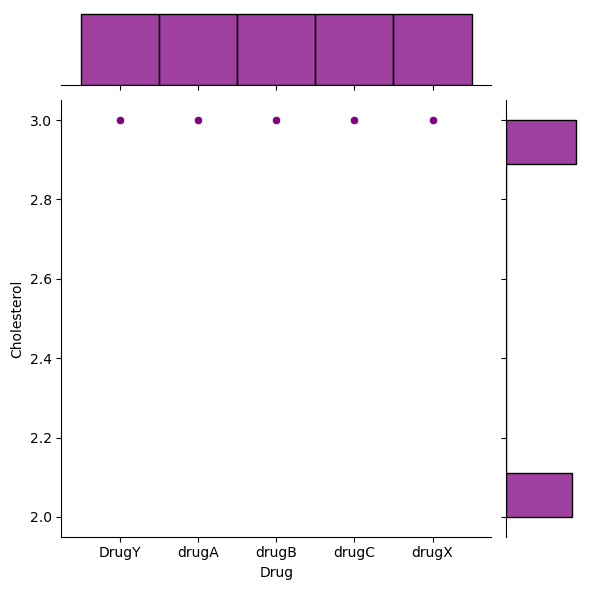

In [488]:
sns.jointplot(x = 'Drug', y = 'Cholesterol', data = df, color="purple")

In [489]:
df['Sex'] = df['Sex'].astype('category')

In [490]:
sex_df = df.groupby(['Sex']).agg({'Age': 'mean'})
df.groupby(['Sex']).agg({'Age': 'mean'})

,Age
Sex,
F,42.562500
M,45.932692


<AxesSubplot:xlabel='Sex', ylabel='Age'>

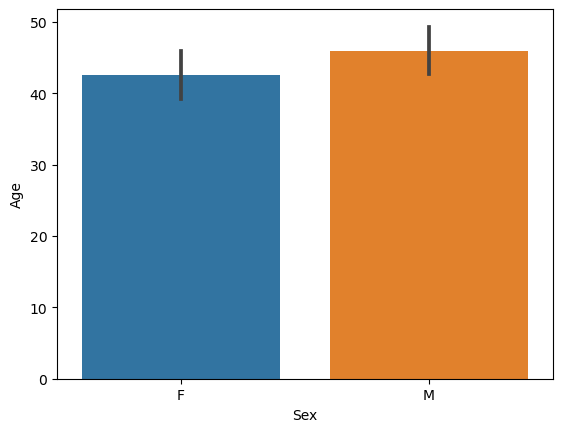

In [491]:
sns.barplot(x = "Sex", y = "Age", data = df)

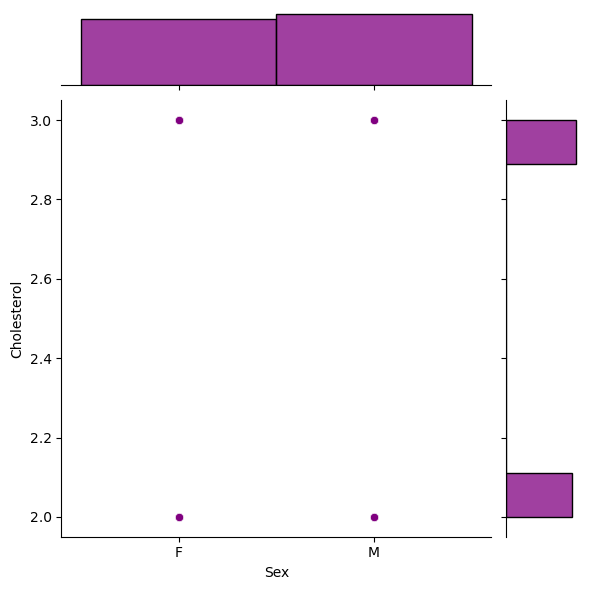

In [492]:
sns.jointplot(x = 'Sex', y = 'Cholesterol', data = df, color="purple")

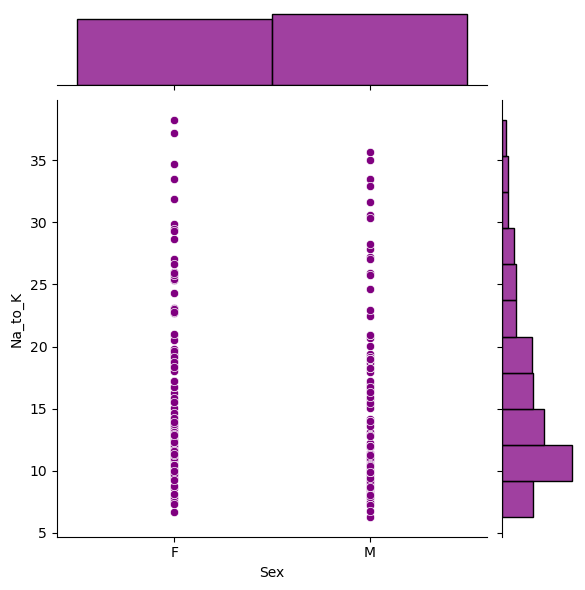

In [493]:
sns.jointplot(x = 'Sex', y = 'Na_to_K', data = df, color="purple")

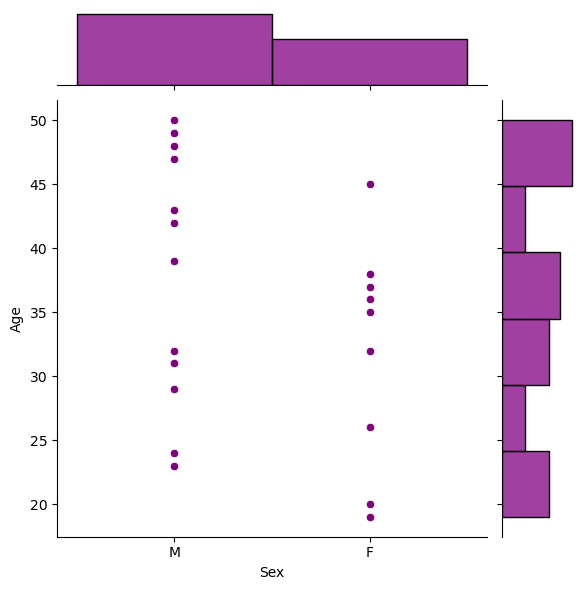

In [524]:
sns.jointplot(x = 'Sex', y = 'Age', data = drugA_df, color="purple")

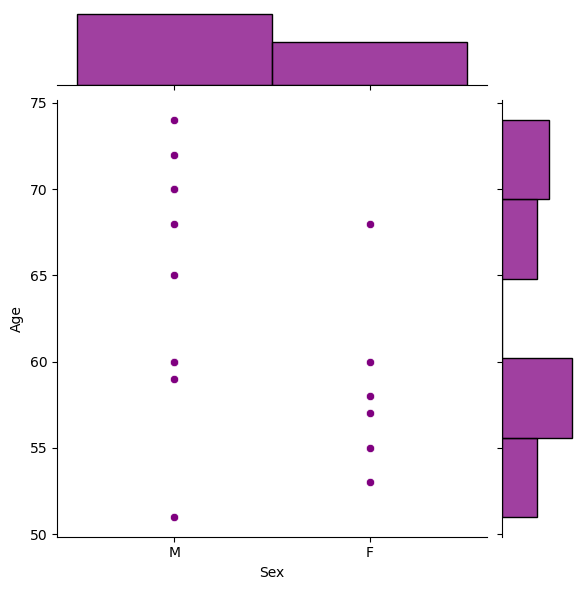

In [526]:
sns.jointplot(x = 'Sex', y = 'Age', data = drugB_df, color="purple")

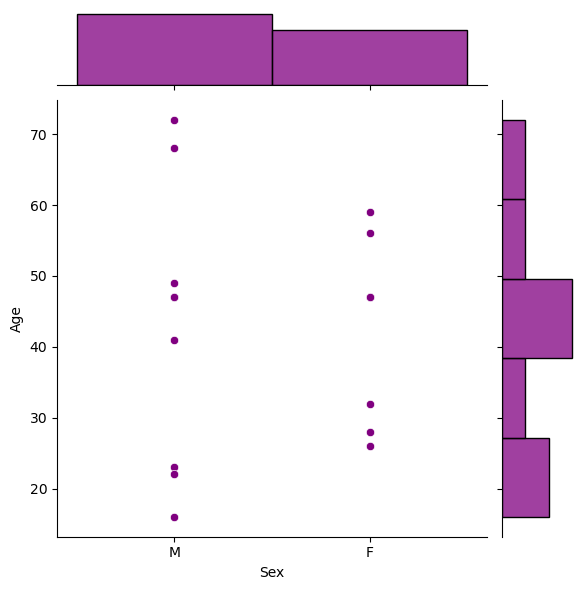

In [527]:
sns.jointplot(x = 'Sex', y = 'Age', data = drugC_df, color="purple")

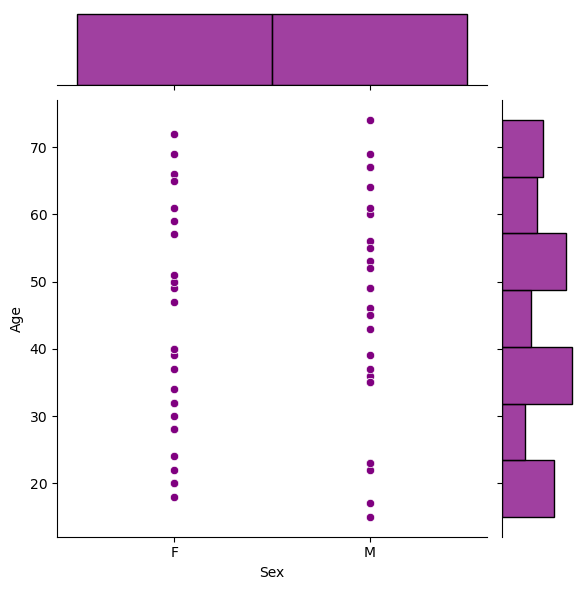

In [528]:
sns.jointplot(x = 'Sex', y = 'Age', data = drugX_df, color="purple")

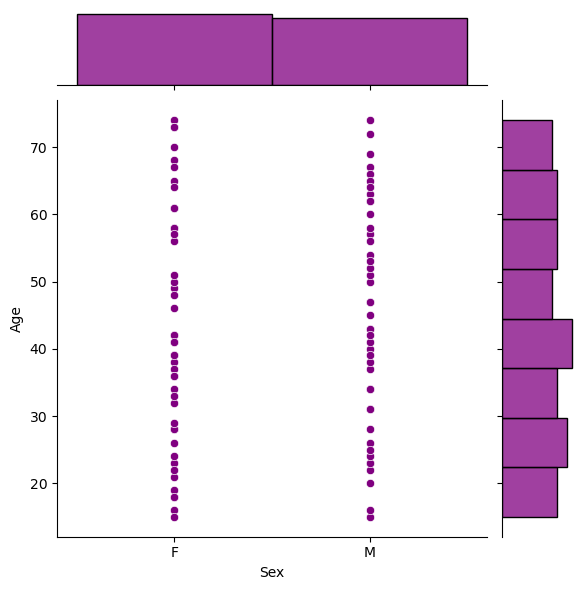

In [531]:
sns.jointplot(x = 'Sex', y = 'Age', data = drugY_df, color="purple")

In [ ]:
#Based on my analysis, there doesn't seem to be a significant difference in 'Sex' breakdown.
#The differences are more apparent in the age groups where the drugs are used. 
#In the analysis of the drugs's own dataframe, it is seen that the NA-K distributions are different.
#When compared by cholesterol levels, DrugC is only used for high cholesterol levels n/ 
#while the others can be used for normal levels as well. 
#I hope you have found this useful.